### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Display settings
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [2]:
#Data
x =np.array([8,5,8,5,2,4,5,3,2,7,4,5,5,8,9])
y =np.array([1,6,4,6,1,7,7,3,5,6,1,2,7,6,4])

### Linear regression equation
#### Y = WX + B

In [3]:
# Linear model
def model(w , x , b):
    return w * x + b

### Cost function ( MSE )  
#### L(W,b)= 1/2m 1∑m (y(i) - yhat(i))^2

In [4]:
# loss function
def loss(w , x , b ,y):
    yhat =model(w , x ,b)
    return (1 / (2 * len(x))) * np.sum((y - yhat) ** 2)

### Gradient descent algorithm
#### W:=W−α ∂W/∂L(W,b)

In [5]:
# Optimization step (gradient descent)
def optim(w, x, b, y):
    yhat = model(w, x, b)
    # Calculate gradients
    der_w = -(1 / len(x)) * np.dot(x, (y - yhat))
    der_b = -(1 / len(x)) * np.sum(y - yhat)
    
    # Update weights
    w -= ler_rate * der_w
    b -= ler_rate * der_b
    
    return w, b

### Iteration

In [6]:
# Iteration loop to train the model
def iter(w, x, b, y, epochs):
    losses = []
    for i in range(epochs):
        w, b = optim(w, x, b,y)
        current_loss = loss(w, x, b, y)
        losses.append(current_loss)  # Track loss at each epoch
        
        # Print the loss every 1000 iterations for tracking
        if i % 1000 == 0:
            print(f'Epoch {i}, Loss: {current_loss}')
            
    return w, b, losses

### Train The model

In [11]:
# Initialize weights and learning rate
w = np.random.rand(1)
b = np.random.rand(1)
ler_rate = 1e-6 # Adjust learning rate

# Train the model
epochs = 80000
w, b, losses = iter(w, x, b, y, epochs)

# Make predictions
predictions = model(w, x, b)
final_loss = loss(w, x, b, y)

Epoch 0, Loss: 3.180852975990424
Epoch 1000, Loss: 3.1691686896287976
Epoch 2000, Loss: 3.158240775235437
Epoch 3000, Loss: 3.1480196095669704
Epoch 4000, Loss: 3.1384588251910075
Epoch 5000, Loss: 3.1295150968703376
Epoch 6000, Loss: 3.121147941962643
Epoch 7000, Loss: 3.113319533916078
Epoch 8000, Loss: 3.1059945280015313
Epoch 9000, Loss: 3.0991398984786973
Epoch 10000, Loss: 3.09272478644579
Epoch 11000, Loss: 3.0867203576719136
Epoch 12000, Loss: 3.0810996697571698
Epoch 13000, Loss: 3.0758375480084346
Epoch 14000, Loss: 3.070910469459045
Epoch 15000, Loss: 3.0662964544979734
Epoch 16000, Loss: 3.061974965609347
Epoch 17000, Loss: 3.0579268127556567
Epoch 18000, Loss: 3.054134064968881
Epoch 19000, Loss: 3.050579967742165
Epoch 20000, Loss: 3.047248865841466
Epoch 21000, Loss: 3.0441261311815833
Epoch 22000, Loss: 3.041198095434292
Epoch 23000, Loss: 3.0384519870580915
Epoch 24000, Loss: 3.03587587245947
Epoch 25000, Loss: 3.0334586010146145
Epoch 26000, Loss: 3.031189753698306
Ep

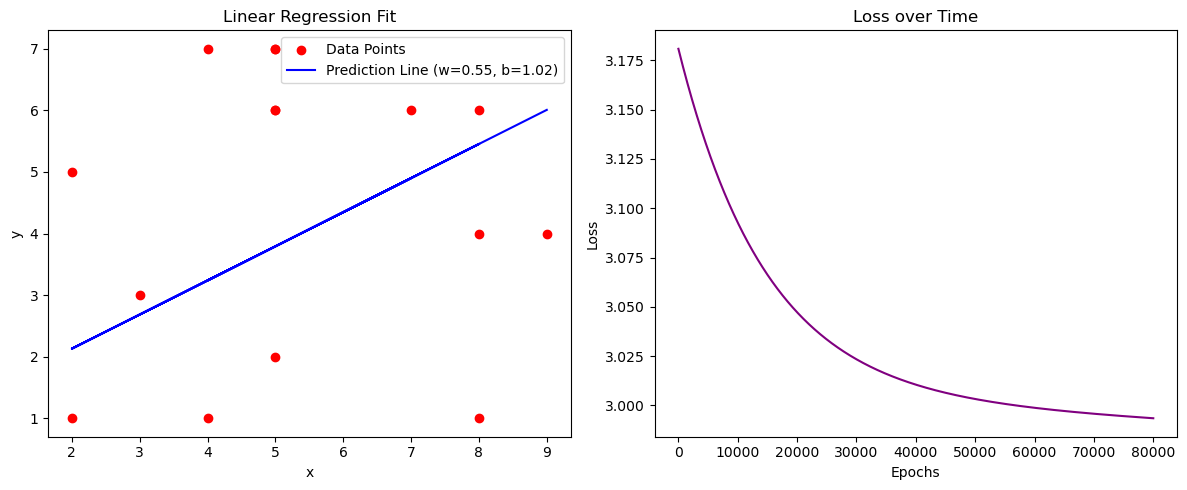

In [12]:
# Visualization
plt.figure(figsize=(12, 5))

# Plot data and prediction line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, predictions, color='blue', label=f'Prediction Line (w={w[0]:.2f}, b={b[0]:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Plot the loss function over iterations
plt.subplot(1, 2, 2)
plt.plot(range(epochs), losses, color='purple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')

plt.tight_layout()
plt.show()